# K Means Clustering

K means clustering is an unsupervised leaning algorithm. It attempts to group similar clusters in your data. Useful for:
- Cluster similar documents
- Cluster customer based on features
- Market segmentation
- Identify similar physical groups

The overall goal is to divide data into distinct groups such that observations within each group is similar.

The K Means algorithm:
- Choose a number of clusters 'K'
- Randomly assign a point to a cluster
- For each cluster compute cluster centroid by taking mean vector of points in the cluster
- Assign each data point to the cluster for which the centroid is the closest

Choosing a K Value:
One way is to use the elbow method. Compute the sum of squared error (SSE) for some values k (2,4,6,8,etc.) The SSE is defined as the sum of the squared distance between each member of the cluster and its centroid.
If you plot k against the SSE, the error decreases as k gets larger, this is because when the number of clusters increases, they are smaller, so distortion is also smaller. The idea of the elbow method is to choose the k at which SSE decreases abruptly, producing an 'elbow effect' in the graph.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create Some Data

In [2]:
from sklearn.datasets import make_blobs

In [20]:
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)

In [21]:
data[0].shape

(200, 2)

# Visualize Data

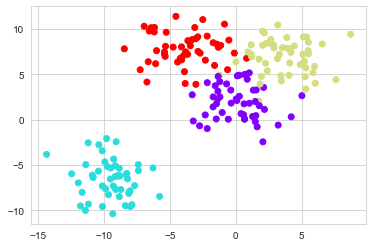

In [22]:
sns.set_style('whitegrid')
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# Creating The Clusters

In [30]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=4)

In [25]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851]])

In [27]:
kmeans.labels_

array([3, 0, 2, 0, 0, 1, 0, 2, 0, 2, 3, 2, 0, 0, 3, 2, 0, 2, 1, 3, 1, 2,
       2, 1, 3, 1, 1, 2, 0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       2, 0, 3, 2, 1, 2, 2, 3, 0, 2, 1, 3, 2, 2, 3, 0, 1, 0, 1, 3, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 3, 2, 2, 1, 0, 1, 2, 2, 2, 3,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 3, 0, 3, 2, 3, 2, 3, 2, 0, 3, 2, 1, 3, 3, 3,
       2, 1, 1, 3, 0, 3, 0, 2, 1, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 3, 2, 0,
       2, 3, 0, 0, 0, 2, 0, 2, 2, 3, 1, 3, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3,
       0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 0, 0, 3, 1, 2, 0, 0,
       1, 2])

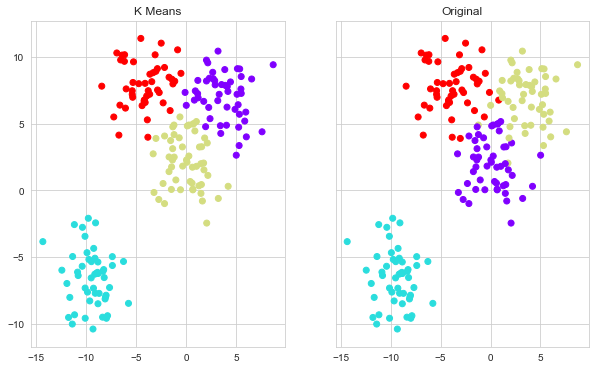

In [33]:
#compare predicted labels to actual labels
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.set_title("K Means")
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In the noisy section of the clusters, K Means could't plot some points accurately to the correct cluster.